In [1]:
%cd ".."

/home/ensai/projet-statistique-2022


In [60]:
from gensim import models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
import sympy as sp

In [6]:
#fichier sous la forme d'un dataframe
cbow_model = models.KeyedVectors.load_word2vec_format('data/tunning/cbow.kv')
df_cbow = pd.DataFrame(cbow_model.vectors,index=cbow_model.index_to_key)
df_cbow.head()

,0,1,2,3,4
produit,0.257901,-0.284141,-0.856004,-3.274468,-1.071729
interdire,0.009629,-0.090049,-0.843565,-3.305084,-1.062671
arreter,-0.138169,-0.003437,-0.558123,-3.245109,-0.895059
plastique,-0.132137,-0.218542,-1.404014,-2.760978,-1.560704
faire,-0.121272,-0.079783,-0.313283,-3.725447,-0.796078


In [8]:
#fichier sous la forme d'un dataframe
skipgram_model = models.KeyedVectors.load_word2vec_format('data/tunning/skipgram.kv')
df_skipgram = pd.DataFrame(skipgram_model.vectors,index=skipgram_model.index_to_key)
df_skipgram.head()

,0,1,2,3,4
produit,0.763479,1.037184,1.653022,-0.628043,0.331397
interdire,0.648397,0.773021,1.567160,-0.886929,0.295207
arreter,0.819477,0.470809,1.475257,-0.695351,0.542293
plastique,0.726545,1.028252,2.200671,-1.816648,-0.504699
faire,0.512788,0.343795,1.136570,-0.504027,1.246065


In [34]:
df_skipgram = df_skipgram.sort_index()
df_cbow = df_cbow.sort_index()
np.all(df_skipgram.index == df_cbow.index)

True

# Sans changement de base

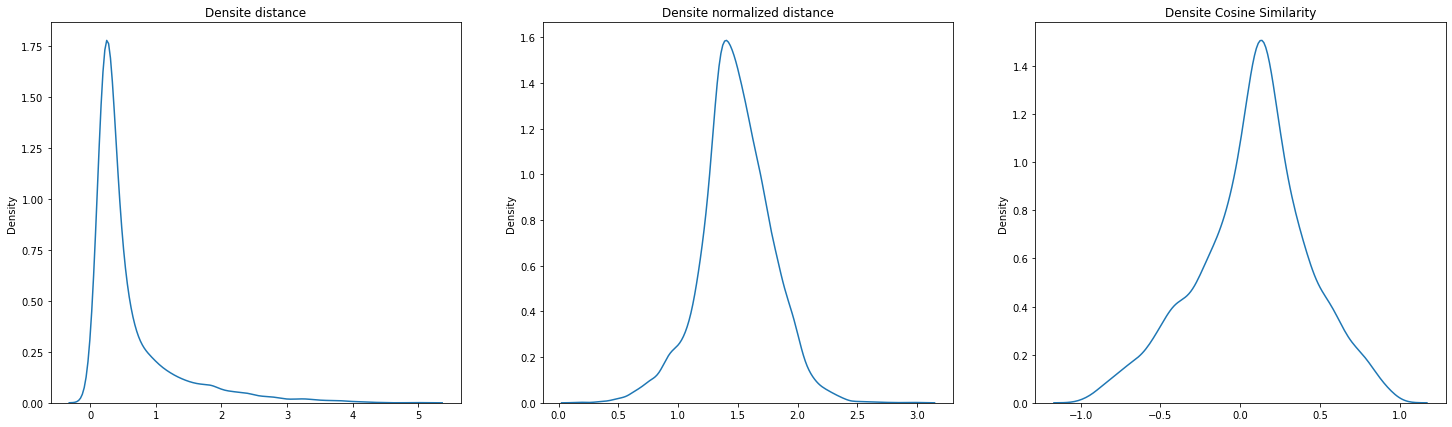

,Distance,Normalized Distance,Cosine
count,7231.000000,7231.000000,7231.000000
mean,0.614073,1.486587,0.077863
std,0.664181,0.295612,0.351146
min,0.020237,0.175531,-0.988638
25%,0.231097,1.322170,-0.125771
50%,0.336276,1.476655,0.106549
75%,0.691773,1.671908,0.289749
max,5.027905,2.995559,0.990405


In [154]:
plt.figure(figsize=(25,7))

# Distance entre skipgram et cbow
square_distance =( ((df_skipgram - df_cbow)**2).sum(axis=1))**(1/2)
# Distance entre skipgram et cbow
norme_product = df_skipgram.apply(np.linalg.norm, axis=1).apply(np.sqrt,axis=1) * df_cbow.apply(np.linalg.norm, axis=1).apply(np.sqrt,axis=1)
square_distance_normalized = square_distance/norme_product
#Cosine similarity
cosineSim = np.diag(cosine_similarity(df_cbow,df_skipgram))

sns.kdeplot(square_distance,ax=plt.subplot(1,3,1,title="Densite distance"))
sns.kdeplot(square_distance_normalized,ax=plt.subplot(1,3,2,title="Densite normalized distance"))
sns.kdeplot(cosineSim,ax=plt.subplot(1,3,3,title="Densite Cosine Similarity"))
plt.show()

#Summary
df_summary = pd.concat([square_distance.describe(),square_distance_normalized.describe(),pd.DataFrame(cosineSim).describe()],axis=1)
df_summary.columns = ["Distance","Normalized Distance","Cosine"]
df_summary

# Apres changement de base

### On prend les d première mots comme nouvelle base puis on effectue un changement de base

In [93]:
#Au cas où on veuille orthonorme la base
def gs(X):
    Q, R = np.linalg.qr(X)
    return Q

In [140]:
cbow_new_base = np.transpose(df_cbow.iloc[:5])
df_cbow2 =  pd.DataFrame(np.transpose(np.linalg.inv(cbow_new_base).dot(np.transpose(df_cbow))),index=df_cbow.index)
df_cbow2

,0,1,2,3,4
a++,1.000000e+00,-1.133644e-08,-4.993778e-08,-1.876567e-08,4.745633e-08
aaa,6.066937e-09,1.000000e+00,-8.815185e-08,5.554813e-08,-1.648200e-07
ab,5.057613e-09,4.312540e-08,1.000000e+00,-4.720999e-09,1.054464e-08
abaissement,4.246935e-08,2.401564e-08,7.613607e-08,1.000000e+00,1.208170e-07
abaisser,1.463284e-08,1.401251e-08,1.936276e-07,-9.832824e-09,1.000000e+00
...,...,...,...,...,...
zero,1.444760e+01,-2.544741e+01,6.631390e+01,-5.927419e+00,-5.932388e+01
zone,4.252179e+01,-7.011562e+01,1.905506e+02,-1.706687e+01,-1.663346e+02
zoo,3.126992e+00,-4.699340e+00,1.234920e+01,-1.242155e+00,-1.005364e+01
~%,1.060395e+00,-3.585890e+00,6.152075e+00,-3.976215e-01,-6.969738e+00


In [144]:
skipgram_new_base = np.transpose(df_skipgram.iloc[:5])
df_skipgram2 =  pd.DataFrame(np.transpose(np.linalg.inv(cbow_new_base).dot(np.transpose(df_skipgram))),index=df_skipgram.index)
df_skipgram3 =  pd.DataFrame(np.transpose(np.linalg.inv(skipgram_new_base).dot(np.transpose(df_skipgram))),index=df_skipgram.index)
df_skipgram2

,0,1,2,3,4
a++,1.379945,-6.227370,11.199504,-1.073204,-10.447154
aaa,0.559624,-2.597035,4.703423,-0.265555,-4.228912
ab,1.431477,-5.667947,8.811071,-0.271770,-7.777123
abaissement,1.600706,-5.831733,10.238366,-0.771353,-9.487776
abaisser,2.256643,-7.853610,14.713241,-1.200804,-13.496401
...,...,...,...,...,...
zero,8.347655,-34.104809,62.139023,-5.734699,-52.746254
zone,9.357604,-44.941135,78.146164,-7.828041,-73.468605
zoo,1.651288,-7.963834,13.964330,-0.944013,-13.729348
~%,0.958167,-3.281302,5.126282,0.155191,-3.936124


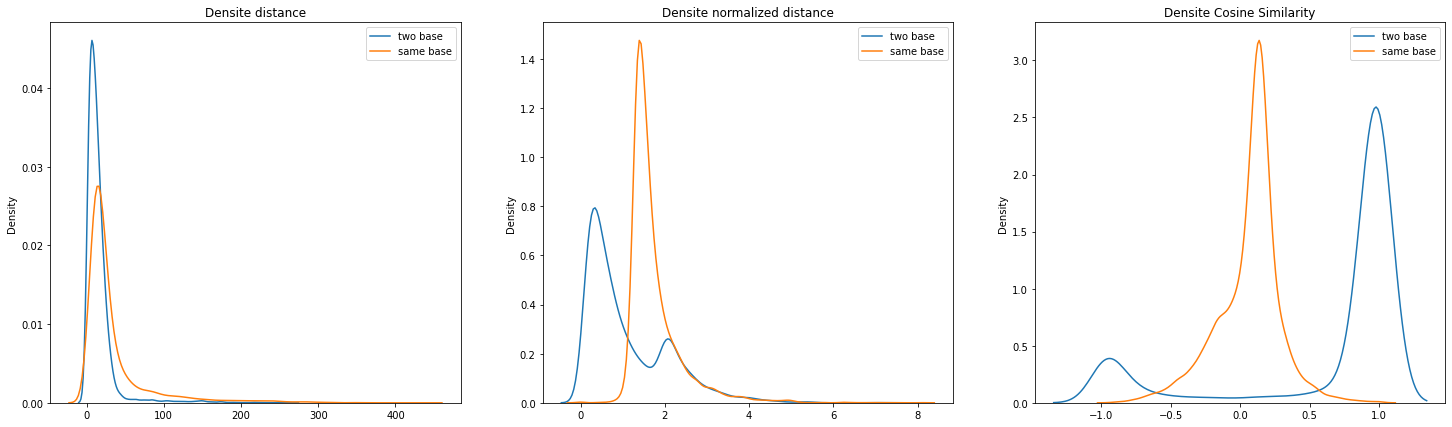

In [153]:
plt.figure(figsize=(25,7))

# Distance entre skipgram et cbow
square_distance2 =( ((df_skipgram2 - df_cbow2)**2).sum(axis=1))**(1/2)
square_distance3 =( ((df_skipgram3 - df_cbow2)**2).sum(axis=1))**(1/2)
# Distance entre skipgram et cbow
norme_product2 = df_skipgram2.apply(np.linalg.norm, axis=1).apply(np.sqrt,axis=1) * df_cbow2.apply(np.linalg.norm, axis=1).apply(np.sqrt,axis=1)
square_distance_normalized2 = square_distance2/norme_product2
norme_product3 = df_skipgram3.apply(np.linalg.norm, axis=1).apply(np.sqrt,axis=1) * df_cbow2.apply(np.linalg.norm, axis=1).apply(np.sqrt,axis=1)
square_distance_normalized3 = square_distance3/norme_product3
#Cosine similarity
cosineSim2 = np.diag(cosine_similarity(df_cbow2,df_skipgram2))
cosineSim3 = np.diag(cosine_similarity(df_cbow2,df_skipgram3))

sns.kdeplot(square_distance2,ax=plt.subplot(1,3,1,title="Densite distance"))
sns.kdeplot(square_distance3,ax=plt.subplot(1,3,1,title="Densite distance"))
plt.legend(["two base","same base"])
sns.kdeplot(square_distance_normalized2,ax=plt.subplot(1,3,2,title="Densite normalized distance"))
sns.kdeplot(square_distance_normalized3,ax=plt.subplot(1,3,2,title="Densite normalized distance"))
plt.legend(["two base","same base"])
sns.kdeplot(cosineSim2,ax=plt.subplot(1,3,3,title="Densite Cosine Similarity"))
sns.kdeplot(cosineSim3,ax=plt.subplot(1,3,3,title="Densite Cosine Similarity"))
plt.legend(["two base","same base"])
plt.show()

In [129]:
df_summary = pd.concat([square_distance2.describe(),square_distance_normalized2.describe(),pd.DataFrame(cosineSim2).describe()],axis=1)
df_summary.columns = ["Distance","Normalized Distance","Cosine"]
df_summary

,Distance,Normalized Distance,Cosine
count,7.231000e+03,7.231000e+03,7231.000000
mean,3.402724e+01,1.746228e+00,0.066558
std,4.479220e+01,6.169470e-01,0.230181
min,1.918136e-07,1.918136e-07,-0.909871
25%,1.185798e+01,1.373615e+00,-0.040670
50%,1.888770e+01,1.546233e+00,0.111985
75%,3.300398e+01,1.878635e+00,0.182437
max,4.375231e+02,8.078678e+00,1.000000
